In [2]:
pip install netcfd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement netcfd (from versions: none)
ERROR: No matching distribution found for netcfd


### Data 
https://polybox.ethz.ch/index.php/s/nQxmgoWOe1pTc3Y

# Classification of similar vertical structures in Indian Ocean [IO] Region

## Importing Libraries and Data

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

import matplotlib.pyplot as plt
#import cartopy.feature as cfeature 
import seaborn as sns
#import cartopy.crs as ccrs
import cmocean

#import argopy
import pyxpcm
from pyxpcm.models import pcm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'netCDF4'

## How to open jupyter file on HPC

+ to open Jupyter notebook in HPC
+ open terminal and type - ssh -X shikha@10.12.1.31
then type passswordd - shikha2018
+ then type conda activate wradlib
++ then type : jupyter-notebook --no-browser 
you will get one port number like localhost:8934
+ then open new terminal window and then type - ssh -N -f -L 8934 (which u got on 1st terminal):localhost:8934 shikha@10.12.1.31 and then enter password
+ now go to 1st terminal again and copy the line (++) and paste it in u r local browser preferabelly chrome and enter password if aasked...andd Done...!

In [2]:
ds98 =xr.open_dataset("/home/cccr/shikha/MAYUR/Project/Data/updated4_30_120_30S_30N_0_1000_2010-01-01_2019-12-31_erddap.nc")

In [59]:
#ds_p =xr.open_dataset("/home/cccr/shikha/MAYUR/Project/Data/4B7C62813AA9233C43816C63D0CEB3A9_ferret_listing.nc")

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/xarray/coding/times.py:517: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


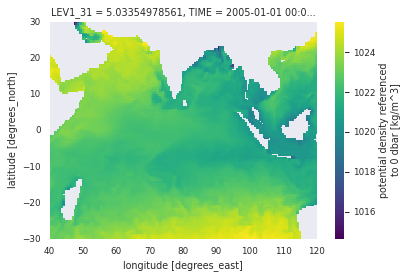

In [70]:
ds_p['PRHO'][0,0].plot()

In [21]:
ds_p['PRHO'][:,1,:,1].shape,ds_p['LON81_240'].shape,ds_p['LAT91_210'].shape

((731, 120), (160,), (120,))

In [22]:
dp=ds_p['PRHO']
lon = ds_p['LON81_240']
lat = ds_p['LAT91_210']
dp.shape,dp.dims

((731, 31, 120, 160), ('TIME', 'LEV1_31', 'LAT91_210', 'LON81_240'))

(array([7.00000e+00, 8.00000e+00, 1.40000e+01, 6.80000e+02, 1.22390e+04,
        4.37250e+04, 5.97960e+04, 7.65940e+04, 1.43111e+05, 7.25270e+04]),
 array([1014.6405 , 1016.02795, 1017.41547, 1018.8029 , 1020.1904 ,
        1021.5779 , 1022.96533, 1024.3528 , 1025.7404 , 1027.1278 ,
        1028.5153 ], dtype=float32),
 <BarContainer object of 10 artists>)

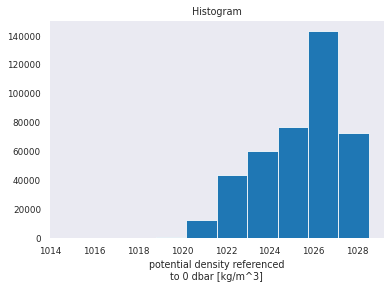

In [28]:
dp[0].plot()

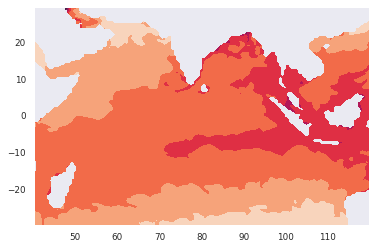

In [23]:
plt.contourf(lon,lat,ds_p['PRHO'][1,1])

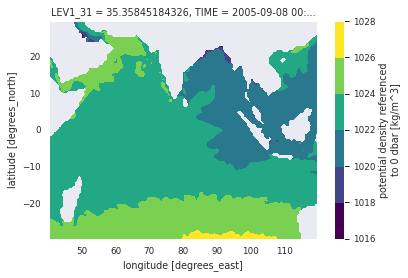

In [24]:
dp[50,3,:,:].plot.contourf()

In [25]:
dp[:,0,:,:].groupby('TIME.year').mean().shape

(7, 120, 160)

In [26]:
date

NameError: name 'date' is not defined

In [ ]:
import datetime as dt
import pandas as pd

In [ ]:
date=[]
for i in range(0,731):
     date.append(str(ds_p['TIME'][i].values))
        

In [94]:
date = np.array(date)
date.shape

(731,)

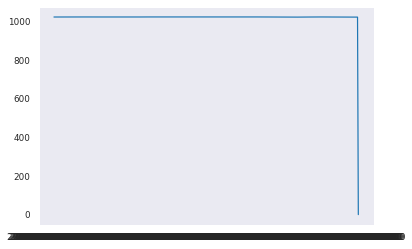

In [96]:
plt.plot(date,dp[:,1].mean(dim=['LON81_240','LAT91_210']))

In [29]:
# pd[:,1].mean(dim=['LON81_240','LAT91_210']).plot()

In [3]:
ds=ds98

In [4]:
ds

<xarray.Dataset>
Dimensions:                (N_LEVELS: 201, N_PROF: 120272)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 -5 -10 -15 ... -990 -995 -1000
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
    N_PROF_                (N_PROF) int64 ...
Dimensions without coordinates: N_PROF
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    PRES                   (N_PROF, N_LEVELS) float32 ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

## Stats of Data

### Bar Plot of Argo Data from 2010 to 2019

In [5]:
ds_time_year=ds.TIME.dt.year.values

ds_year_count=[]

for i in range(0,10):
    ds_year_count.append(ds_time_year.tolist().count(2010+i))
    
ds_year_count

[8764, 9882, 11286, 11722, 11148, 13819, 14458, 16091, 11379, 11723]

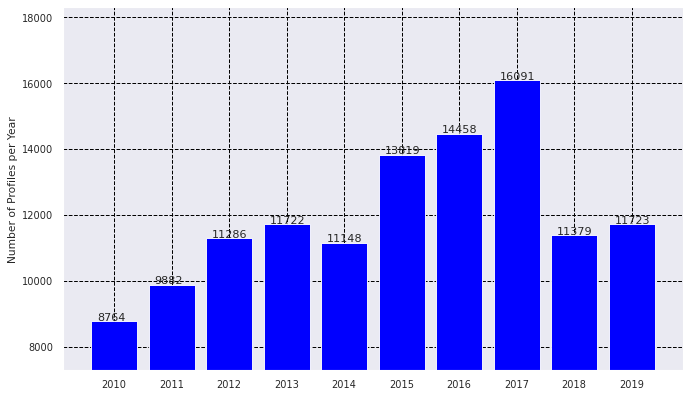

In [6]:
import math

## Decadal Sampling of Argo floats

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

x2 = np.arange(10)
y2 = [8764, 9882, 11286, 11722, 11148, 13819, 14458, 16091, 11379, 11723]

width = 0.8
  
# plot data in grouped manner of bar type
plt.bar(x2, y2, width, color='blue',align='center')


plt.xticks(x2, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
label2 = ['8764', '9882', '11286', '11722', '11148', '13819', '14458', '16091', '11379', '11723']

for i in range(0,10):
    plt.text(x = x2[i]-0.3 , y = y2[i]+30, s = label2[i], size = 10)

    
# plt.xticks(x, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("Number of Profiles per Year")
plt.grid(color = 'black', linestyle = 'dashed', linewidth = 0.9)


# "Y min and max"
low = min(y2)
high = max(y2)
plt.ylim([math.ceil(low-0.2*(high-low)), math.ceil(high+0.3*(high-low))])

plt.show()

In [7]:
### Plotting Monthly Data

ds_time_month=ds.TIME.dt.month.values

ds_month_count=[]
    

for i in range(0,12):
    ds_month_count.append(ds_time_month.tolist().count(1+i))
    
ds_month_count

[10538, 9466, 10220, 9899, 10335, 9731, 10152, 9995, 9746, 10167, 9942, 10081]

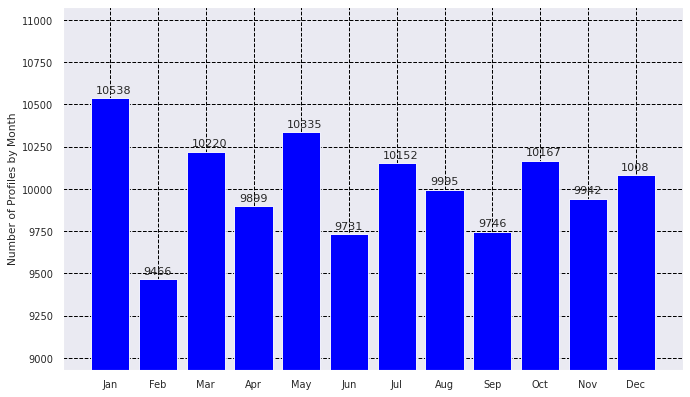

In [8]:
## Plotting Seasonal Sampling of Argo floats

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

x = np.arange(12)
y1 = [10538,9466,10220,9899,10335,9731,10152,9995,9746,10167,9942,10081]

width = 0.8
  
# plot data in grouped manner of bar type
plt.bar(x, y1, width, color='blue',align='center')


plt.xticks(x, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

label = ['10538','9466','10220','9899','10335','9731','10152','9995','9746','10167','9942','1008']

for i in range(0,12):
    plt.text(x = x[i]-0.3 , y = y1[i]+30, s = label[i], size = 10)



# plt.xticks(x, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("Number of Profiles by Month")
plt.grid(color = 'black', linestyle = 'dashed', linewidth = 0.9)
low = min(y1)
high = max(y1)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

# for i in range(len(y1)):
#     plt.annotate(x[i], (-0.1 + i, x[i] + j))

# plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()

### Flots intensity plots

In [9]:
ss=pd.DataFrame({'TIME':ds['TIME'].values,'LAT':ds['LATITUDE'].values,'LONG':ds['LONGITUDE'].values})
ss['Count']=1
ss.sort_values(by='LAT').sort_values(by='LONG')


##************************************************************************************************
z = np.arange(0,-1010,-10.0)
pcm_features = {'temperature': z, 'salinity':z}
m = pcm(K=8, features=pcm_features,maxvar=8)

In [10]:
vv=[]
x_range=range(-30,31,10)
y_range=range(30,121,10)
for x in range(len(x_range)-1):
    for y in range(len(y_range)-1):
#         print(x_range[x],x_range[x+1],y_range[y],y_range[y+1])
#         vv.append(ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&(ss['LONG'].between(y_range[y],y_range[y+1])))].count()[0])
#         print(x_range[x],x_range[x+1],y_range[y],y_range[y+1])
        df_temp=ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&
                    ss['LONG'].between(y_range[y],y_range[y+1]))]

        cnt=ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&
                ss['LONG'].between(y_range[y],y_range[y+1]))].count()[0]

        df_temp['Count']=cnt
        vv.extend(df_temp.values)

<ipython-input-10-2a1085c94456>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Count']=cnt


In [11]:
f_data=pd.DataFrame(vv)
f_data.columns=ss.columns
# f_data

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
No handles with labels found to put in legend.


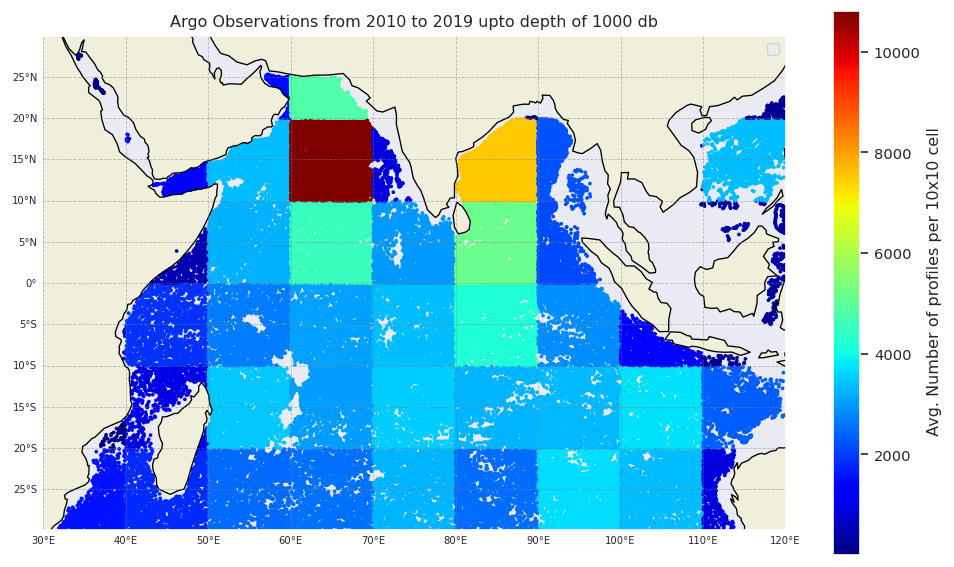

In [12]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([30,120,-22,22]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, subplot_kw=subplot_kw)

# kmap = m.plot.cmap()
# sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=0.5, transform=proj)
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'], vmin=f_data['Count'].min(), vmax=f_data['Count'].max(), cmap='rainbow')
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],  cmap='rainbow')
sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],s=2,cmap='jet')
# cl = m.plot.colorbar(ax=ax)
cl=plt.colorbar(sc)
gl =m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.legend()
# ax.add_feature(cfeature.RIVERS)
# ax.gridlines()

ax.set_title('Argo Observations from 2010 to 2019 upto depth of 1000 db')
cl.ax.set_ylabel(' Avg. Number of profiles per 10x10 cell')

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results//Observations since 2010 to 2019.jpg",dpi=800)
plt.show()


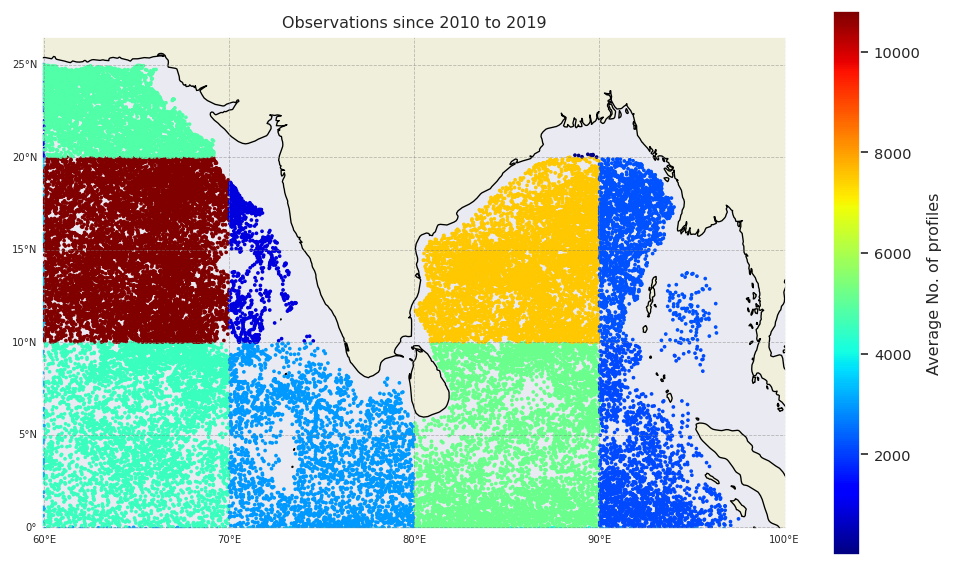

In [13]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([60,100,0,25]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

# kmap = m.plot.cmap()
# sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=0.5, transform=proj)
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'], vmin=f_data['Count'].min(), vmax=f_data['Count'].max(), cmap='rainbow')
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],  cmap='rainbow')
sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],s=2,cmap='jet')
# cl = m.plot.colorbar(ax=ax)
cl=plt.colorbar(sc,label='Average No. of profiles')
gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.RIVERS)
# ax.gridlines()
ax.set_title('Observations since 2010 to 2019')
# plt.legend()
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/Observations since 2010 to 2019 in IO.jpg",dpi=600)
plt.show()

## PCA Analysis

### PCA calculation of Temperature

In [14]:
df1=pd.DataFrame(ds98['TEMP'][:].values)

In [15]:
x = StandardScaler().fit_transform(df1)
x = pd.DataFrame(x)

In [16]:
# np.mean(x),np.std(x)

In [17]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
pca_temp = pd.DataFrame(data = principalComponents,  columns = ['temperature_0','temperature_1', 'temperature_2','temperature_3','temperature_4','temperature_5','temperature_6','temperature_7'])

In [18]:
pca_temp.values[0]#,pca_temp[0]

array([-2.1548095 ,  2.4887035 , -2.878793  ,  1.529588  ,  0.3631909 ,
       -0.11624282, -0.84304506,  0.38466445], dtype=float32)

In [19]:
np_psal[0]

NameError: name 'np_psal' is not defined

#### PCA of Temperature profiles Explained Variance and Sum

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

### PCA calculation of Salinity

In [ ]:
dfs=pd.DataFrame(ds98['PSAL'][:].values)

In [ ]:
x2 = StandardScaler().fit_transform(dfs)
x2 = pd.DataFrame(x)

In [ ]:
pca2 = PCA(n_components=8)
principalComponents = pca2.fit_transform(x2)
pca_psal = pd.DataFrame(data = principalComponents,  columns = ['salinity_0','salinity_1', 'salinity_2','salinity_3','salinity_4','salinity_5','salinity_6','salinity_7'])

In [ ]:
# pca_psal

####  PCA_PSAL Explained Variance and Sum

In [ ]:
pca2.explained_variance_ratio_

In [ ]:
sum(pca2.explained_variance_ratio_)

In [ ]:
######Plotting of PC's


# plt.figure(figsize=(8,6))
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# # targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# colors = ['r', 'g', 'b']
# # for target, color in zip(targets,colors):
# #     indicesToKeep = finalDf['target'] == target
# ax.scatter(principalDf['principal component 3'],c = color)
# # ax.legend(targets)
# ax.grid()

## Bayesian information criteria (BIC)

### Randomly Selection of Profile

In [ ]:
import random
list=[]
for i in range(1205):
        r=random.randint(1,120000)
        if r not in list: list.append(r)
            
            
            
list.sort()


In [ ]:
rand_temp = pca_temp.iloc[list]
# rand_temp
rand_psal = pca_psal.iloc[list]
# rand_psal

np_psal=rand_psal.copy(). to_numpy()
np_temp=rand_temp.copy(). to_numpy()

In [ ]:
ts1 = xr.DataArray([np_temp,np_psal])

### Gaussian Mixture Model Selection (Selection of number of classes $'K'$)

In [ ]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [ ]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 30)
cv_types = ['full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # fit a Gaussian mixture model
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(ts1[1])
        bic.append(gmm.bic(ts1[1]))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

In [ ]:
# Plot the BIC scores
plt.figure(figsize=(20, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.8, color='darkblue',align='edge'))

plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
# xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#     .2 * np.floor(bic.argmin() / len(n_components_range))
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xticks(n_components_range)
spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], cv_types)


#
minb = np.where(bic.min())
plt.figure(figsize=(20, 6))
plt.plot(n_components_range, bic, '.r-',markersize = 10,color='blue')
plt.xticks(n_components_range)
plt.text(7.9, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=20,color='red')


plt.show()

## _*$Gaussian Mixture Model $*_ [GMM]

### Fitting the Data to the Trained Model

In [5]:
z = np.arange(0,-1000.0,-10.0)
pcm_features = {'temperature': z}
# z

In [6]:
m = pcm(K=8, features=pcm_features, maxvar=4)
m

<pcm 'gmm' (K: 8, F: 1)>
Number of class: 8
Number of feature: 1
Feature names: odict_keys(['temperature'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

In [54]:
features_in_dp = {'temperature': 'PRHO'}
features_zdim='LEV1_31'

In [55]:
dp.attrs['feature_name'] = 'temperature'
# ds['PSAL'].attrs['feature_name'] = 'salinity'
dp['LEV1_31'].attrs['axis'] = 'Z'

In [56]:
m.fit(dp, features=features_in_dp, dim=features_zdim)

AttributeError: 'DataArray' object has no attribute 'pyxpcm'

In [79]:
m.predict(ds, features=features_in_ds,inplace=True)

<xarray.Dataset>
Dimensions:                (N_LEVELS: 201, N_PROF: 120272)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 1 2 3 ... 120269 120270 120271
  * N_LEVELS               (N_LEVELS) int64 0 -5 -10 -15 ... -990 -995 -1000
    LATITUDE               (N_PROF) float64 12.17 -12.68 ... -16.06 -21.54
    LONGITUDE              (N_PROF) float64 84.45 85.95 47.85 ... 51.92 78.89
    TIME                   (N_PROF) datetime64[ns] 2010-01-01T00:31:38 ... 20...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 6654 1170 8905
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    PRES                   (N_PROF, N_LEVELS) float32 ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 33.87 33.87 ... 34.51
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 27.67 27.67 ... 4.915
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
    PCM_LABELS             (N_PROF) int64 7 0 3 7 1 7 0 3 4 ... 5 2 0 0 4 5 4 4
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [49]:
dp.dims

('TIME', 'LEV1_31', 'LAT91_210', 'LON81_240')

In [80]:
m.predict_proba(ds, features=features_in_ds, inplace=True)

<xarray.Dataset>
Dimensions:                (N_LEVELS: 201, N_PROF: 120272, pcm_class: 8)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 1 2 3 ... 120269 120270 120271
  * N_LEVELS               (N_LEVELS) int64 0 -5 -10 -15 ... -990 -995 -1000
    LATITUDE               (N_PROF) float64 12.17 -12.68 ... -16.06 -21.54
    LONGITUDE              (N_PROF) float64 84.45 85.95 47.85 ... 51.92 78.89
    TIME                   (N_PROF) datetime64[ns] 2010-01-01T00:31:38 ... 20...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 6654 1170 8905
Dimensions without coordinates: pcm_class
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    PRES                   (N_PROF, N_LEVELS) float32 ...
    PRES_QC                (N_PROF) int64 ...
    ...                     ...
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 27.67 27.67 ... 4.915
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
    PCM_LABELS             (N_PROF) int64 7 0 3 7 1 7 0 3 4 ... 5 2 0 0 4 5 4 4
    PCM_POST               (pcm_class, N_PROF) float64 0.1755 0.9987 ... 0.0
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

### Visualizing Results

#### Quantile Plots

In [81]:
for vname in ['TEMP', 'PSAL']:
    ds= ds.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)
# ds

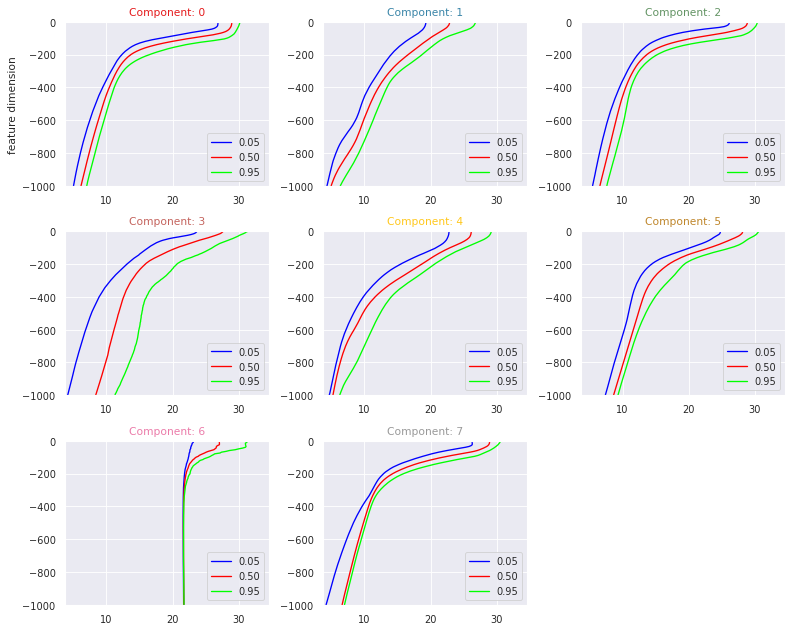

In [82]:
fig, ax = m.plot.quantile(ds['TEMP_Q'])
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/quantile09_var3.jpg")

In [83]:
# fig, ax = m.plot.quantile(ds['PSAL_Q'])
# plt.savefig("quantile2.jpg")


#### Cluster's 

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/pyxpcm/plot.py:111: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  colorbar = plt.colorbar(mappable, **kwargs)
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


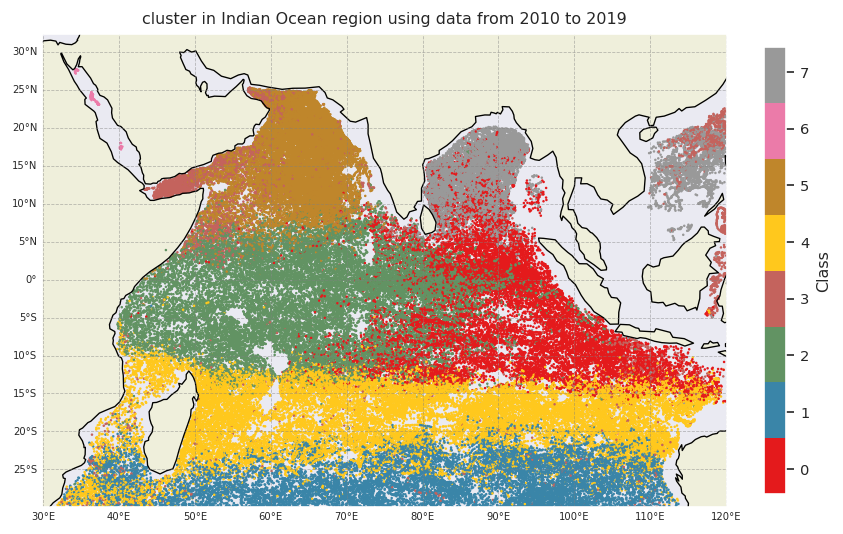

In [84]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([30,120,-22,24]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=0.5, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.COASTLINE)
ax.set_title('cluster in Indian Ocean region using data from 2010 to 2019')
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/500-1000_clusters02_var8.png",dpi=800)
plt.show()


In [6]:
# proj = ccrs.PlateCarree()
# subplot_kw={'projection': proj, 'extent': np.array([30,120,-22,24]) + np.array([-0.1,+0.1,-0.1,+0.1])}
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

# # kmap = m.plot.cmap()
# sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'],s=0.5, c=ds['PCM_LABELS'], cmap='jet', transform=proj, vmin=0, vmax=7)
# # cl = m.plot.colorbar()

# gl = m.plot.latlongrid(ax, dx=10)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.set_title('LABELS of the training set')
# plt.colorbar(sc,)
# # plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/clusters09_var3.png",dpi=800)
# plt.show()


#### Posterior Probabilities of profiles

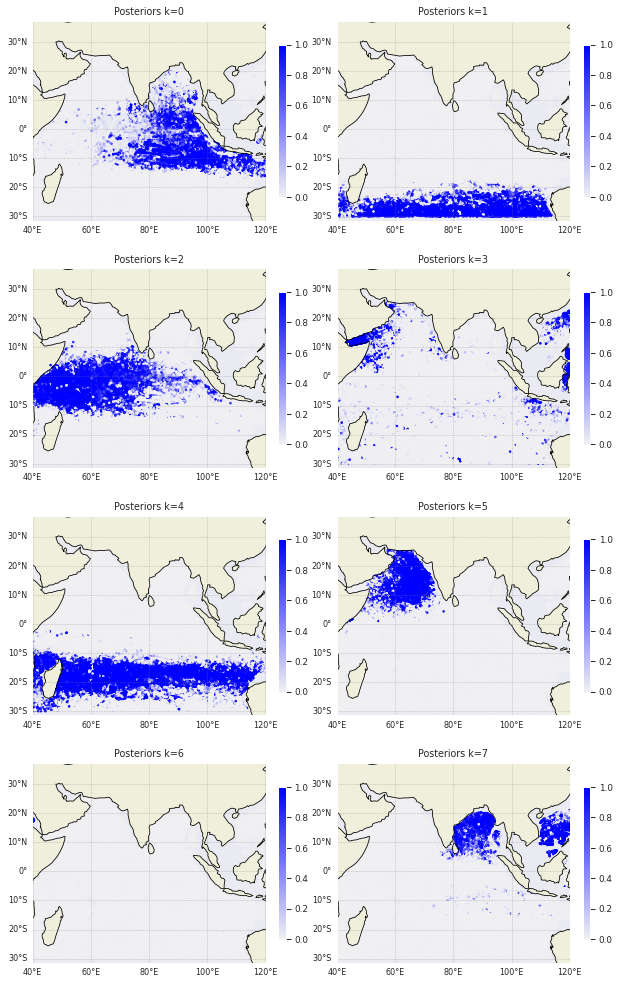

In [86]:
cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([40,120,-25,30]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_POST'].sel(pcm_class=k),
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('Posteriors k=%i' % k)
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/500-1000_Posteriors02_var8.jpg")

#### Other Plots

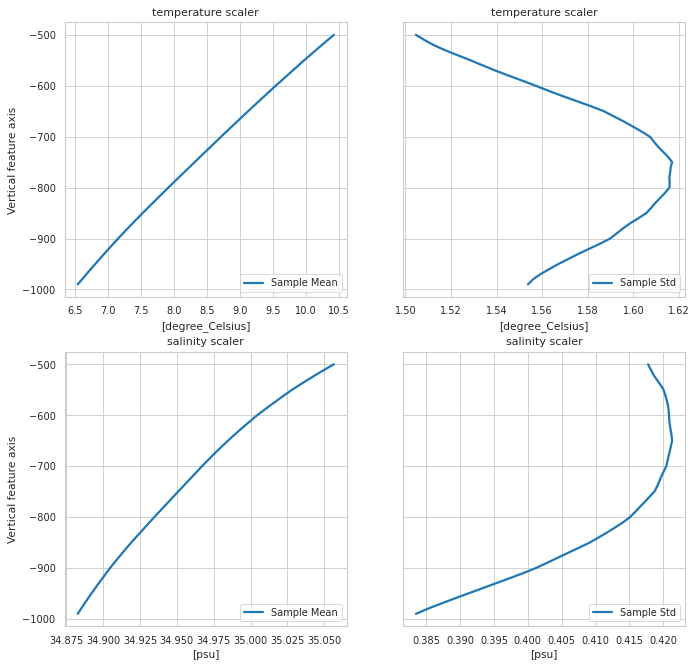

In [54]:
fig, ax = m.plot.scaler()
# plt.savefig("sacler02.jpg")

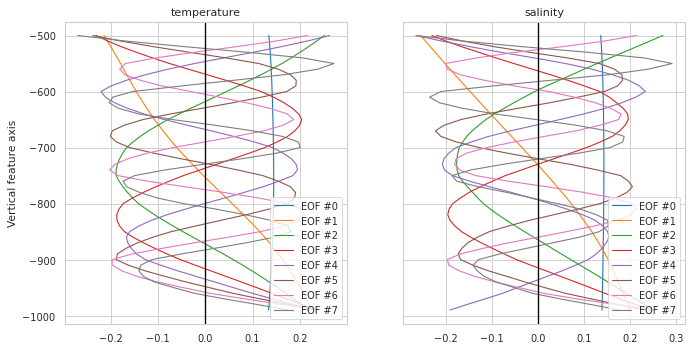

In [55]:
fig, ax = m.plot.reducer()

# Equivalent to:
# pcmplot.reducer(m)

# More options:
# m.plot.reducer(pcalist = range(0,2));
# m.plot.reducer(pcalist = [0], maxcols=1);
# m.plot.reducer(pcalist = range(0,2), style='darkgrid',  plot_kw={'linewidth':1.5}, subplot_kw={'ylim':[-1000,0]}, figsize=(12,10));

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/reducer09_var3.jpg")

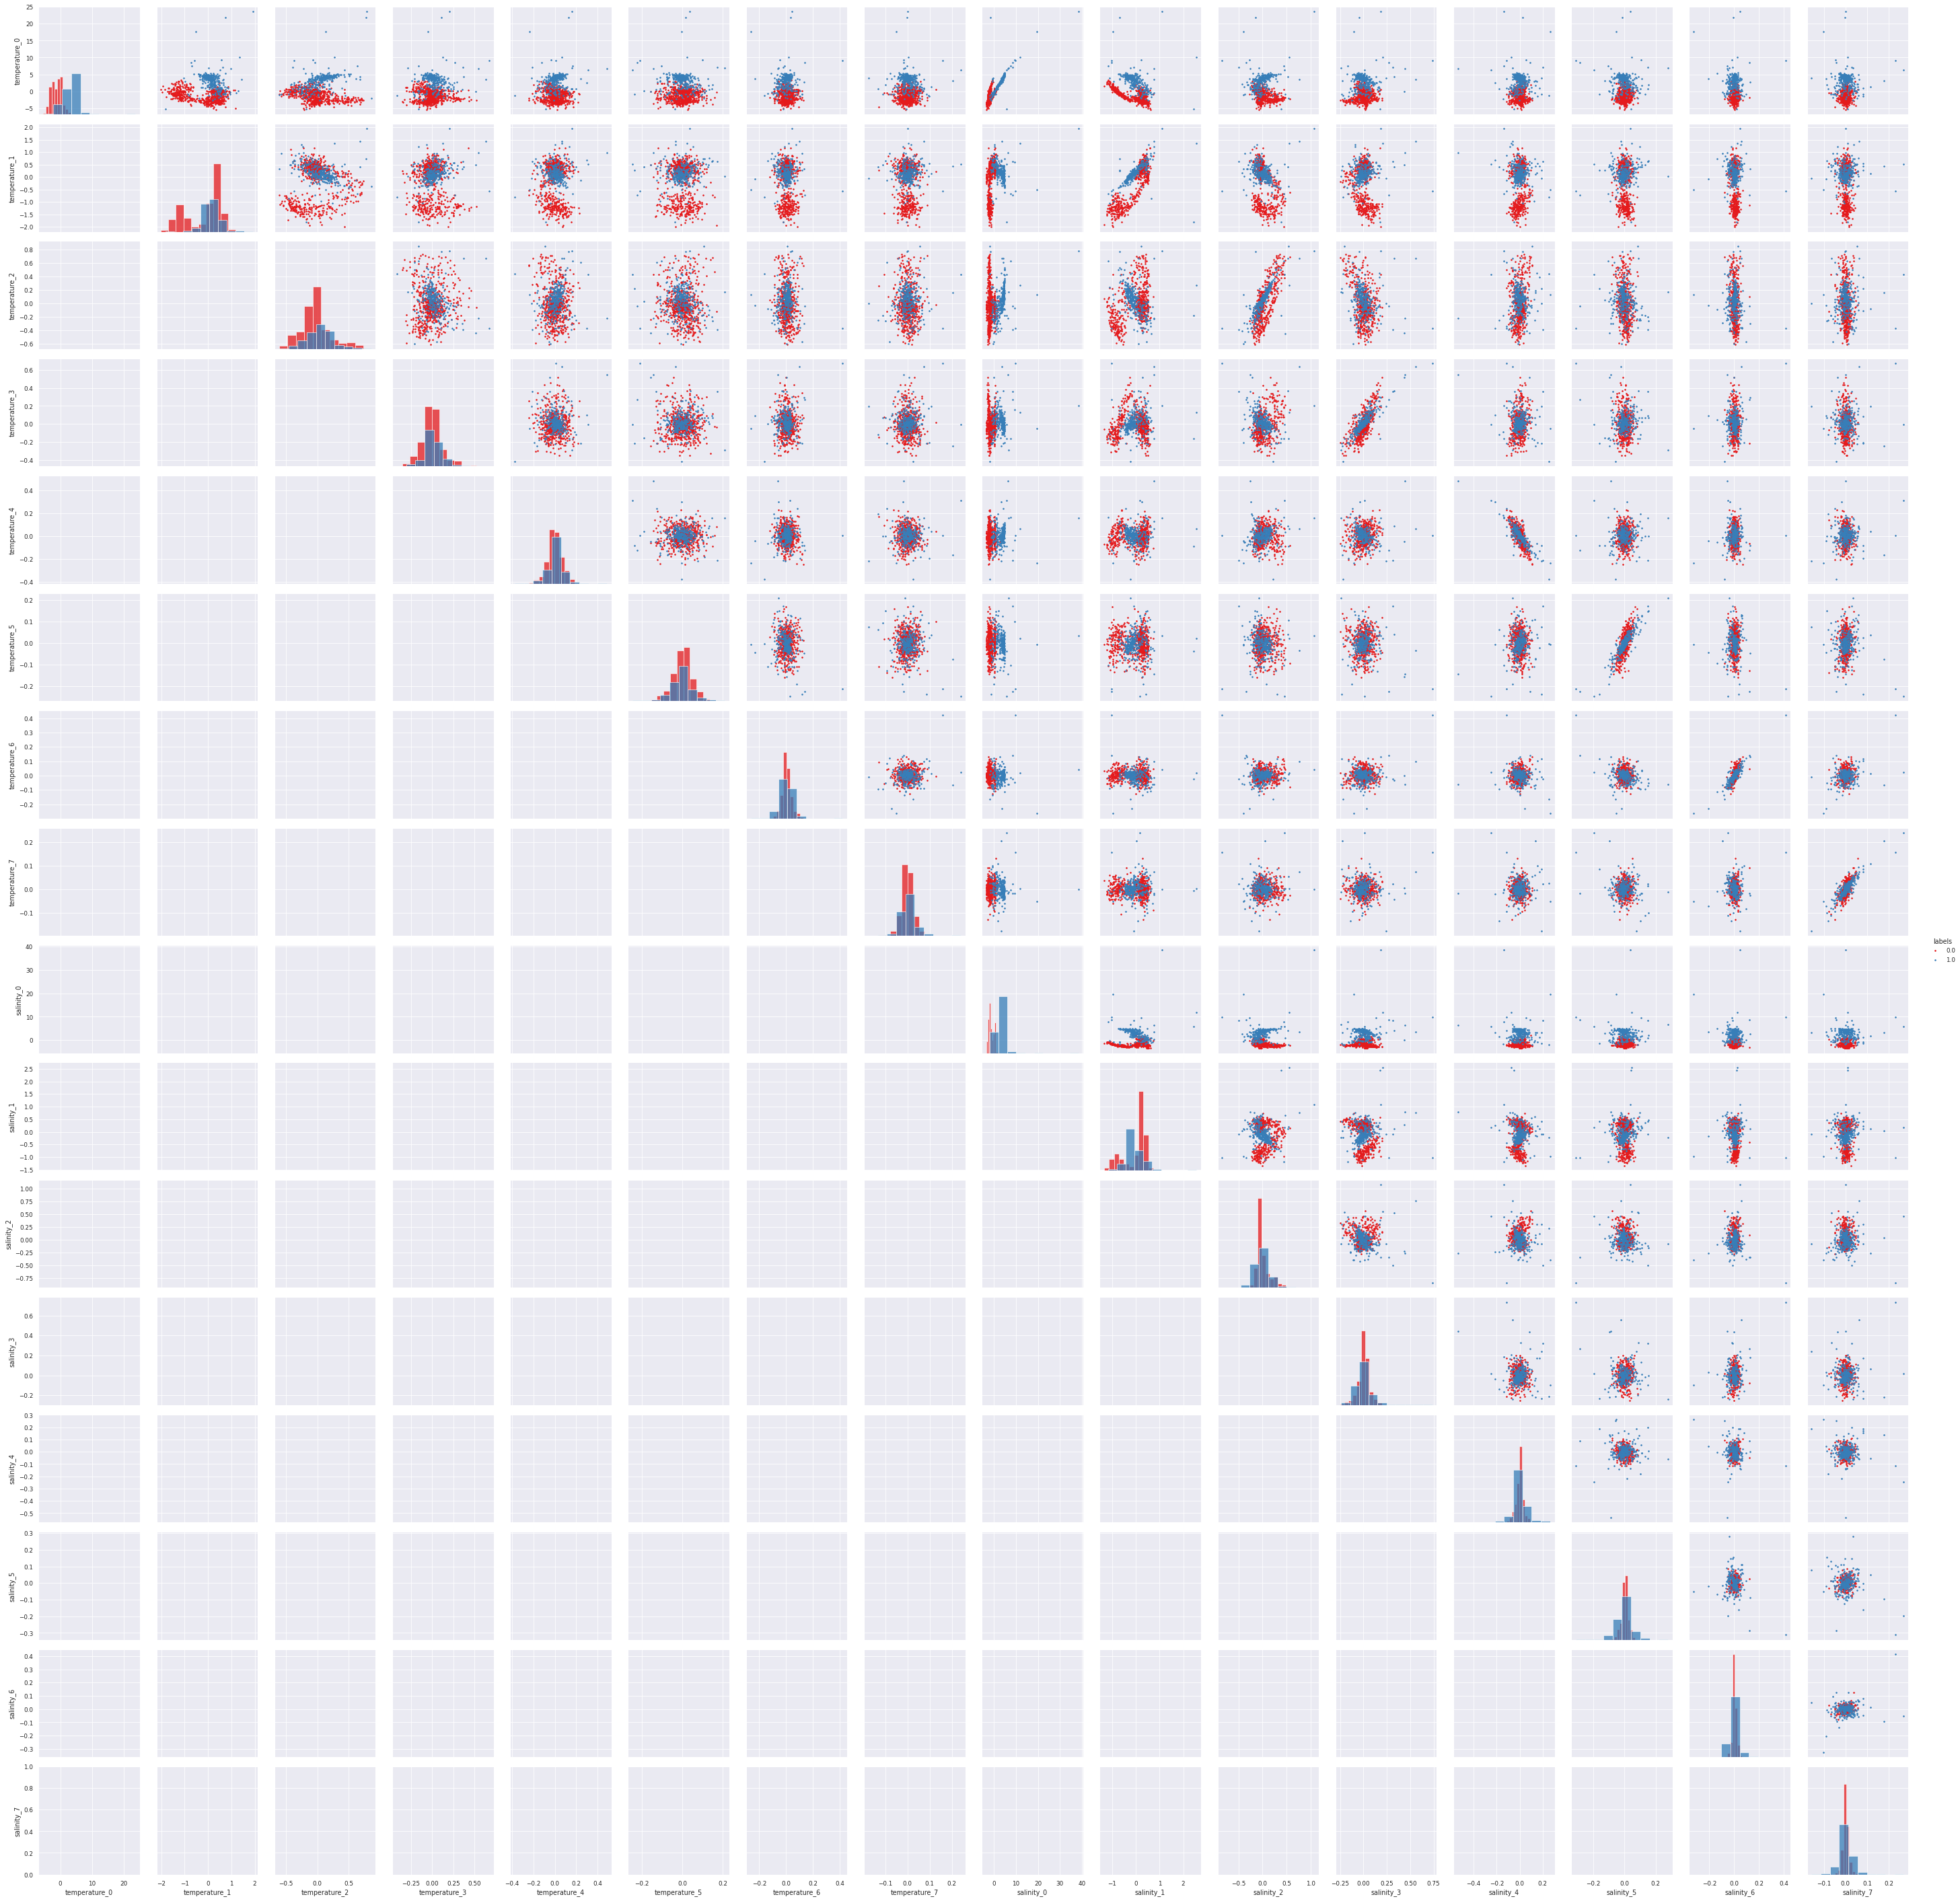

In [56]:
g = m.plot.preprocessed(ds, features=features_in_ds, style='darkgrid')
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/PCA_09_var3.jpg")

In [57]:
# def plot_pmesh(ds):
#     fig = plt.figure(figsize=(8,12))
# #     df.sort_values(by=['LONGITUDE', 'LATITUDE'], ascending=[True, False], inplace=True)
# #     granularity = 50j
# #     df.sort_values(by=['LONGITUDE', 'LATITUDE'], ascending=[True, False], inplace=True)
#     x = ds['LONGITUDE'].values
#     y = ds['LATITUDE'].values
#     z = ds['N_PROF'].values
#     ax = plt.axes(projection=ccrs.PlateCarree())
#     plt.title('number of profiles in a 10x10 grid')

#     ax.coastlines(zorder=1)
#     sct = plt.scatter(x, y, c=z,s=15, cmap=cmocean.cm.dense,zorder=0)
#     cbar = fig.colorbar(sct, cmap=cmocean.cm.dense, shrink=.25)
#     return fig

# plt.show()

In [58]:
# # Profile Plot
# N_PROF = 100000 #Specify a profile to plot

# for i in range(0,10):
#     plt.plot(ds.TEMP[i], ds.PRES[i])
# #     plt.plot(ds.PSAL[21], ds.PRES[21])

# plt.xlabel('Temperature (C)')
# plt.ylabel('Pressure (dbar)')
# # plt.title('Argo Profile from %s' % ds.juld[N_PROF].dt.strftime('%a, %b %d %H:%M').values)

# plt.gca().invert_yaxis() #Flip the y-axis

In [59]:
# # T-S Diagram with depth
# plt.figure(figsize=(8,6))

# # nprof = 25 #Selected profile
# for i in range(0,500):
#     plt.scatter(ds.PSAL[i], ds.TEMP[i], c=ds.PRES[i], cmap='viridis_r')

    
# plt.xlabel('Salinity');
# plt.ylabel('Temperature (°C)')

# cbh = plt.colorbar();
# cbh.set_label('Pressure (dbar)')
# # plt.savefig('tempvssal.jpg')

## Conclusions

# Extra Stuff

## BIC

In [60]:
dt = ds['TEMP'][0]
dp = ds['PSAL'][0]

In [61]:
rand_temp.values[0]

NameError: name 'rand_temp' is not defined

In [ ]:
ts = xr.DataArray([dt,dp])

In [ ]:
# # Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(rand_temp)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
#                                            color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(rand_temp[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180. * angle / np.pi  # convert to degrees
#     v = 2. * np.sqrt(2.) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(.5)
#     splot.add_artist(ell)

In [ ]:
# later, just do a very simple bic plot
# bic = np.array(bic)

# # plot the BIC scores
# plt.figure(figsize=(20, 10))
# plt.style.use('seaborn-darkgrid')
# spl = plt.subplot(2, 1, 1)
# plt.plot(n_components_range,bic)
# plt.xticks(n_components_range)
# plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
# plt.title('BIC score per model')
# xpos = np.where(bic == np.amin(bic))[0][0] + n_components_range[0]
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
# spl.set_xlabel('Number of components')
# plt.show()

# # numbers of components
# n_comp = best_gmm.n_components

# # print best number of classes
# print('Number of classes with minimum BIC score')
# print(n_comp)